# EDA Individual Project

## "Has social media influenced Spanish society's opinion on feminism (or antifeminism)?"

## Table of Contents

- [Influencers initial dataset](#influencers-initial-dataset)
  - [Visual Insights](#visual-insights)
- [Feminism and Antifeminism Codebook](#feminism-and-Antifeminism-codebook)


In [138]:
# # TO INSTALL
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !pip install pandas openpyxl

In [139]:
import pandas as pd
import re

## Influencers initial dataset

In [140]:
path_file_influencers = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Influencers Initial Dataset.xlsx"

df_influencers = pd.read_excel(path_file_influencers)

df_influencers.head()

,id,influencer's name,real name,age,ref. edad,education,ref. educacion,previous_occupation,ref. ocupacion,main platform,secondary platform,# follower,link_plataforma
0,1,Ibai Llanos,Ibai Llanos Garatea,28,Ibai Llanos - Wikiwand,4,https://www.wikiwand.com/es/Ibai_Llanos,Narrador esports,▷ Ibai Llanos Wiki ≫ Biografía de este Influen...,Twitch,Youtube,"12,8M",ibai - Twitch
1,2,Maria Pombo,María Pombo,28,https://www.modelocurriculum.net/biografias/in...,4,https://www.modelocurriculum.net/biografias/in...,NaN,NaN,Instagram,NaN,"2,9M",https://www.instagram.com/mariapombo/
2,3,Naim Darrechi,Naim Darrechi,20,https://historia-biografia.com/naim-darrechi/,NaN,NaN,-,-,TikTok,Instagram,29M,https://www.tiktok.com/@naimdarrechi?lang=es
3,4,Jordi Wild,Jordi Carrillo de Albornoz Torres,38,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,6,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,-,NaN,YouTube,Twitter,"3,59M",The Wild Project - YouTube
4,5,Iker Unzu,Iker Unzueta Ramos,18,"Iker Unzu - Edad, Familia, Biografía | Famous ...",3,Iker Unzu | Wiki YouTube Pedia | Fandom,-,-,TikTok,YouTube,"11,4M",Iker Unzu (@ikerunzu) oficial | TikTok


In [141]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26 non-null     int64 
 1   influencer's name    26 non-null     object
 2   real name            26 non-null     object
 3   age                  26 non-null     int64 
 4   ref. edad            25 non-null     object
 5   education            23 non-null     object
 6   ref. educacion       23 non-null     object
 7   previous_occupation  25 non-null     object
 8   ref. ocupacion       24 non-null     object
 9   main platform        26 non-null     object
 10  secondary platform   24 non-null     object
 11  # follower           26 non-null     object
 12  link_plataforma      25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.8+ KB


In [142]:
df_influencers.shape

(26, 13)

In [143]:
df_influencers.isna().sum() 

id                     0
influencer's name      0
real name              0
age                    0
ref. edad              1
education              3
ref. educacion         3
previous_occupation    1
ref. ocupacion         2
main platform          0
secondary platform     2
# follower             0
link_plataforma        1
dtype: int64

In [144]:
#remove columns 

df_influencers = df_influencers.drop(['id','real name', 'ref. edad', 'education','ref. educacion', 'previous_occupation', 'ref. ocupacion','link_plataforma'], axis = 1) 

In [145]:
df_influencers.rename(columns={'# follower': 'followers'}, inplace=True) 

In [146]:
df_influencers['followers'] #I am going to do a simple process in which I transform objects to numbers using "apply" and "lamda" functions

0     12,8M
1      2,9M
2       29M
3     3,59M
4     11,4M
5     40,4M
6      308K
7     1,75M
8     10,5M
9      264K
10     3,2M
11    1,53M
12     1,9M
13     2,2M
14     468K
15     207K
16     1,5M
17     2,8M
18    1,36M
19    17,9M
20     323K
21     699K
22     166K
23    10,2M
24    8,71M
25    3,23M
Name: followers, dtype: object

In [147]:
df_influencers['followers'] = df_influencers['followers'].apply(lambda x: float(x.replace('M', '').replace('K', '').replace(',', '.')) * 1e6)

# df['followers'].str.replace("M","")
# df['followers'].str.replace("K","")
# pd.to_numeric(df['followers']) cuando de error, mirarlo y to_numerci dice qué caracter

In [148]:
df_influencers['followers']  #this is just the "sanity checking"

0      12800000.0
1       2900000.0
2      29000000.0
3       3590000.0
4      11400000.0
5      40400000.0
6     308000000.0
7       1750000.0
8      10500000.0
9     264000000.0
10      3200000.0
11      1530000.0
12      1900000.0
13      2200000.0
14    468000000.0
15    207000000.0
16      1500000.0
17      2800000.0
18      1360000.0
19     17900000.0
20    323000000.0
21    699000000.0
22    166000000.0
23     10200000.0
24      8710000.0
25      3230000.0
Name: followers, dtype: float64

In [149]:
df_influencers 
# at this point I am able to see what I want to analize, At this point, 
# I can see the structure of the df_influencers dataset and focus on the aspects I want to analyze, this leads us to the visual inssigths:

,influencer's name,age,main platform,secondary platform,followers
0,Ibai Llanos,28,Twitch,Youtube,12800000.0
1,Maria Pombo,28,Instagram,NaN,2900000.0
2,Naim Darrechi,20,TikTok,Instagram,29000000.0
3,Jordi Wild,38,YouTube,Twitter,3590000.0
4,Iker Unzu,18,TikTok,YouTube,11400000.0
5,ElRubius,33,YouTube,Twitch,40400000.0
6,Samantha Hudosn,23,Instagram,Twitter,308000000.0
7,Roma Gallardo,34,YouTube,Twitter,1750000.0
8,DalasReview,26,YouTube,Twitter,10500000.0
9,Sindy Takanashi,30,Instagram,NaN,264000000.0


In [150]:
df_influencers['age'].describe() #about numerical data in dataframe

count    26.000000
mean     29.807692
std       6.026735
min      18.000000
25%      26.500000
50%      29.500000
75%      33.000000
max      45.000000
Name: age, dtype: float64

In [151]:
df_influencers.describe(exclude='number') #explicar este cuadro, interesante

,influencer's name,main platform,secondary platform
count,26,26,24
unique,26,4,6
top,Ibai Llanos,YouTube,Twitter
freq,1,12,8


### Visual Insights

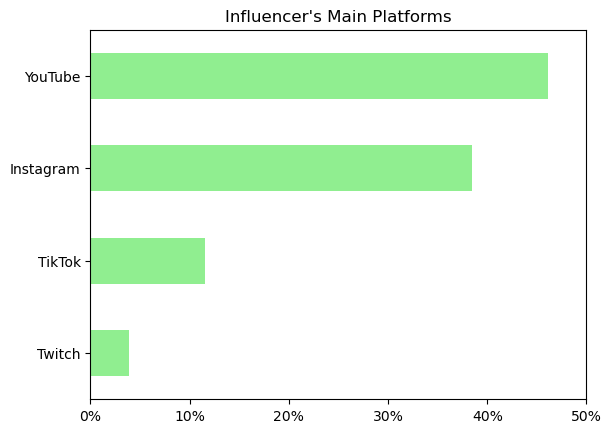

In [152]:
import matplotlib.pyplot as plt

# Bar chart for Influencers' Main Platforms

value_counts = df_influencers['main platform'].value_counts(ascending=True, normalize=True) * 100  # Convertir a porcentaje
ax = value_counts.plot(kind='barh', color='lightgreen')

plt.title("Influencer's Main Platforms")
plt.ylabel('')

plt.xlim(0, 50) 

# Ticks for X axis
ax.set_xticks(range(0, 51, 10))  
ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])  # Format the ticks as percentages

plt.show()

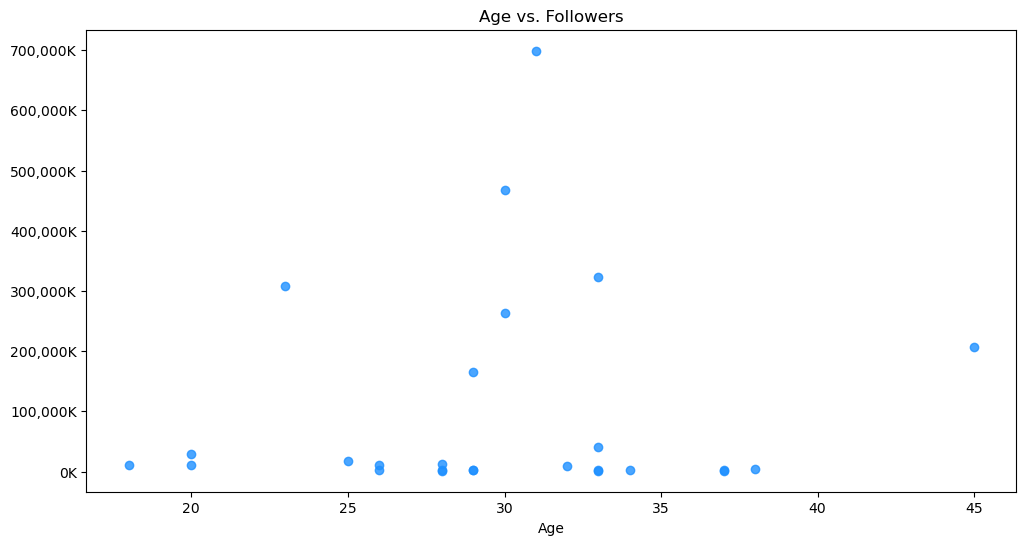

In [153]:
import matplotlib.ticker as ticker

# Scatterplot age vs. follower
plt.figure(figsize=(12, 6))
plt.scatter(df_influencers['age'], df_influencers['followers']/1000, color='dodgerblue', alpha=0.8)
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('')

ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K'))  # formato sin notación científica, 
plt.show()

In [154]:
import seaborn as sns
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_influencers['age'], df_influencers['followers'])
print(f'Correlation between age and number of followers: {correlation:.2f}')

print(f'p-value: {p_value:.3f}') 

Correlation between age and number of followers: 0.09
p-value: 0.655


## Feminism and Antifeminism Codebook

In [155]:
import matplotlib.pyplot as plt
import nltk

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [156]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues
